#About Data

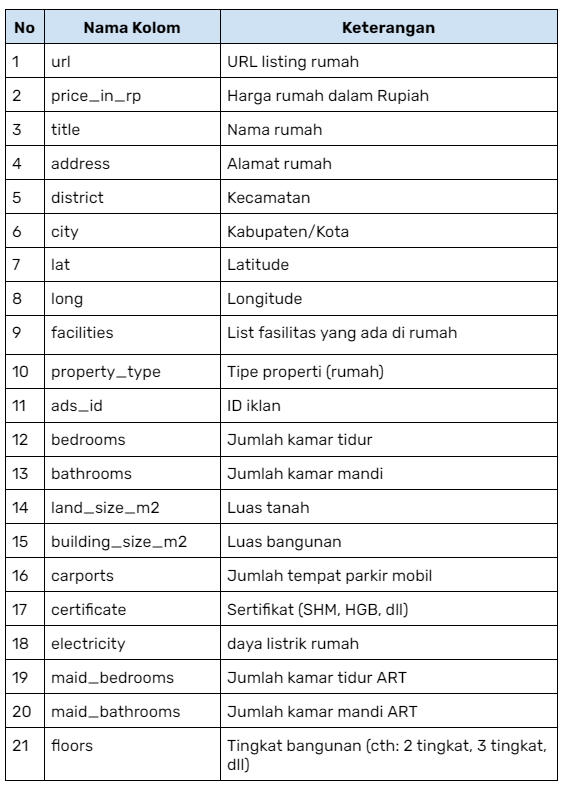

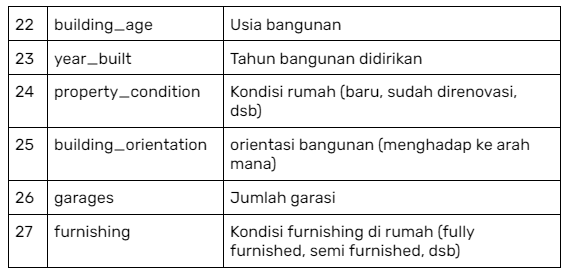

Keterangan tambahan:
1. Facilities untuk setiap rumah itu unik.
2. Carports dan Garage adalah entitas yang berbeda.
3. lat dan long merepresentasikan estimasi lokasi geodetis dari area dimana rumah tersebut berada, berdasarkan variabel alamat (bukan koordinat spesifik dari setiap rumah).


#Dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("jabodetabek_house_price.csv")

In [74]:
df.head(3)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished


#Data Unterstanding

In [75]:
df.shape

(3553, 27)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

#EDA

In [77]:
pip install pandas-profiling

In [78]:
# from pandas_profiling import ProfileReport

# # Membuat laporan AutoPandas Profiling
# report = ProfileReport(df)

# # Menyimpan laporan dalam bentuk file HTML
# report.to_file('output1.html')


In [79]:
# report

In [80]:
pip install autoviz

In [81]:
# %matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class
# plt.figure(figsize=(10, 5))
# AV = AutoViz_Class()
# df_av = AV.AutoViz(r'jabodetabek_house_price.csv')
# plt.show()


Analisis

In [82]:
#Constant
df = df.drop('property_type', axis=1)

In [83]:
#duplicate
df[df['url'] == 'https://www.rumah123.com/properti/tangerang/hos10121234/#qid~ee681e3d-c9e4-4718-ac4c-a651ac12aa71']
df = df.drop(2936)

In [84]:
#Categorical Data
address_cat = ['Sentul City, Bogor','Alam Sutera, Tangerang','Gading Serpong, Tangerang', 'Pantai Indah Kapuk, Jakarta Utara', 'BSD, Tangerang', 'BSD City, Tangerang', 'Sawangan, Depok', 'Harapan Indah, Bekasi', 'Cinere, Depok', 'Cibinong, Bogor']

def replace_address(row):
    if row['address'] not in address_cat:
        return 'other'
    else:
        return row['address']

# Menggunakan fungsi replace_address untuk mengubah nilai address
df['address'] = df.apply(replace_address, axis=1)

In [85]:
df['address'].value_counts()

other                                2523
Sentul City, Bogor                    282
Alam Sutera, Tangerang                115
Gading Serpong, Tangerang              97
Pantai Indah Kapuk, Jakarta Utara      94
BSD, Tangerang                         83
Sawangan, Depok                        75
BSD City, Tangerang                    75
Harapan Indah, Bekasi                  74
Cinere, Depok                          68
Cibinong, Bogor                        66
Name: address, dtype: int64

In [86]:
district_cat = ['Sentul City','Alam Sutera','Gading Serpong', 'Pantai Indah Kapuk', 'BSD', 'BSD City', 'Sawangan', 'Harapan Indah', 'Cinere', 'Cibinong']

def replace_district(row):
    if row['district'] not in district_cat:
        return 'other'
    else:
        return row['district']

df['district'] = df.apply(replace_district, axis=1)

In [87]:
df['district'].value_counts()

other                 2521
Sentul City            282
Alam Sutera            115
Gading Serpong          97
Pantai Indah Kapuk      94
BSD                     83
Sawangan                75
BSD City                75
Harapan Indah           74
Cinere                  70
Cibinong                66
Name: district, dtype: int64

In [88]:
#Olah data facilities
facilities_cat = ['Keamanan, Taman', 'Taman, Keamanan', 'Keamanan 24 jam', 'Taman', 'Jalur Telepon','Keamanan', 'Tempat Jemuran', 'Ac', 'Taman, Tempat Jemuran, Keamanan 24 jam', 'AC']

def replace_facilities(row):
    if row['facilities'] not in facilities_cat:
        return 'other'
    else:
        return row['facilities']

df['facilities'] = df.apply(replace_facilities, axis=1)
df['facilities'] = df['facilities'].str.replace('Ac','AC')
df['facilities'] = df['facilities'].str.replace('Keamanan, Taman','Taman, Keamanan')

In [89]:
df['facilities'].value_counts()

other                                     2737
Taman, Keamanan                            572
Keamanan 24 jam                             57
Taman                                       46
Jalur Telepon                               37
Keamanan                                    34
AC                                          32
Tempat Jemuran                              22
Taman, Tempat Jemuran, Keamanan 24 jam      15
Name: facilities, dtype: int64

In [90]:
#cek duplicate pada ads_id
df[df['ads_id'] == 'hos11004265']
df = df.drop([2466,2467])

In [91]:
df[df['ads_id'] == 'hos11368613']
df = df.drop([1987,1988])

In [92]:
df[df['ads_id'] == 'hos11368227']
df = df.drop([1560,1561])

In [93]:
df[df['ads_id'] == 'hos11074240']
df = df.drop(2114)

In [94]:
df[df['ads_id'] == 'hos11279294']
df = df.drop([2118])

In [95]:
df[df['ads_id'] == 'hos10990873']
df = df.drop([2117])

In [96]:
df[df['ads_id'] == 'hos11362404']
df = df.drop(3411)

In [97]:
df[df['ads_id'] == 'hos11366720']
df = df.drop(1644)

In [98]:
df[df['ads_id'] == 'hos10120187']
df = df.drop(2365)

In [99]:
df[df['ads_id'] == 'hos10966632']
df = df.drop(1434)

In [100]:
#Olah data electricity
df['electricity'] = df['electricity'].str.slice(stop=-4)
df['electricity'] = df['electricity'].replace('lainnya', np.nan)
df['electricity'] = pd.to_numeric(df['electricity'])

In [101]:
#Data Terbalik
mask = df['furnishing'] == 'baru'
temp = df.loc[mask, 'property_condition'].copy()
df.loc[mask, 'property_condition'] = df.loc[mask, 'furnishing']
df.loc[mask, 'furnishing'] = temp

In [102]:
df['property_condition'].value_counts()

bagus             1431
baru              1352
bagus sekali       260
sudah renovasi     157
butuh renovasi      94
Name: property_condition, dtype: int64

Handling Issue

In [103]:
df = df.drop(['url','title', 'ads_id'], axis=1)

In [104]:
#Correlation
df = df.drop(['bathrooms','year_built'], axis=1)

In [105]:
#missing
df = df.drop(['building_age','building_orientation'], axis=1)

In [106]:
df['certificate'] = df['certificate'].fillna(df['certificate'].mode().iloc[0])
df['furnishing'] = df['furnishing'].fillna(df['furnishing'].mode().iloc[0])
df['property_condition'] = df['property_condition'].fillna(df['property_condition'].mode().iloc[0])

In [107]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['land_size_m2'] = df['land_size_m2'].fillna(df['land_size_m2'].mean())
df['building_size_m2'] = df['building_size_m2'].fillna(df['building_size_m2'].mean())
df['electricity'] = df['electricity'].fillna(df['electricity'].mean())
df['floors'] = df['floors'].fillna(df['floors'].mean())

In [108]:
df.isnull().sum().sum()

0

In [109]:
#handling outlier
def winsorize_column_iqr(df, column, multiplier):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - multiplier * iqr
    upper_limit = q3 + multiplier * iqr
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df


column_name = ['lat','long','bedrooms','land_size_m2','building_size_m2','carports','maid_bedrooms','maid_bathrooms','floors','garages']
iqr_multiplier = 1.5

for col in column_name:
  df = winsorize_column_iqr(df, col, iqr_multiplier)


In [110]:
Q1 = df['price_in_rp'].quantile(0.25)
Q3 = df['price_in_rp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price_in_rp'] >= lower_bound) & (df['price_in_rp'] <= upper_bound)]

In [111]:
#bedrooms skewed
bed_log = np.log(df['bedrooms'])
bed_log.skew()

0.01909163836882669

In [112]:
maidBed_sqrt = np.sqrt(df['maid_bedrooms'])
maidBed_sqrt.skew()

0.6199975506556292

In [113]:
bed_sqrt = np.sqrt(df['garages'])
bed_sqrt.skew()

0.4639276662561991

In [114]:
df['bedrooms'] = np.sqrt(df['bedrooms'])
df['maid_bedrooms'] = np.sqrt(df['maid_bedrooms'])
df['garages'] = np.sqrt(df['garages'])

<ipython-input-114-dc135f06382f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'] = np.sqrt(df['bedrooms'])
<ipython-input-114-dc135f06382f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maid_bedrooms'] = np.sqrt(df['maid_bedrooms'])
<ipython-input-114-dc135f06382f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [115]:
# X = df.drop('certificate',axis=1)
# y = df['certificate']

In [116]:
# #imbalance : oversampling
# #certificate
# from imblearn.over_sampling import RandomOverSampler
# # Menerapkan RandomOverSampler untuk oversampling
# ros = RandomOverSampler()
# X, y = ros.fit_resample(X, y)

In [117]:
# df = pd.concat([X,y], axis=1)

#Data Preprocessing

In [118]:
X = df.drop('price_in_rp',axis=1)
y = df['price_in_rp']

In [119]:
from imblearn.over_sampling import RandomOverSampler
# Menerapkan RandomOverSampler untuk oversampling
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [120]:
# Hitung korelasi antara fitur-fitur dan target
correlation = X.corrwith(y)

# Urutkan berdasarkan nilai absolut korelasi
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Tampilkan nama-nama fitur yang memiliki korelasi tertinggi dengan target
important_features = sorted_correlation.index
print("Fitur yang paling penting:")
for feature in important_features:
    print(feature)

Fitur yang paling penting:
building_size_m2
land_size_m2
maid_bathrooms
electricity
maid_bedrooms
bedrooms
floors
carports
long
lat
garages


<ipython-input-120-c214802d0326>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = X.corrwith(y)


In [121]:
selected_columns = ['district', 'city', 'facilities', 'certificate', 'property_condition', 'building_size_m2', 'land_size_m2', 'maid_bathrooms', 'electricity']
# selected_columns = ['district', 'city', 'facilities', 'certificate', 'property_condition', 'building_size_m2', 'land_size_m2', 'maid_bathrooms','electricity', 'bedrooms','floors','carports','garages']
X = X[selected_columns]

In [122]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
cat_col = ['district', 'city', 'facilities','certificate','property_condition']
X[cat_col] = encoder.fit_transform(X[cat_col])

<ipython-input-122-03922ee24182>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_col] = encoder.fit_transform(X[cat_col])


#Pemodelan

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [161]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [162]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [163]:
#visualisasi performa model
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regresion', 'KNN', 'Desicion Tree', 'Random Forest']
mae = []
mse = []
r2 = []

##Linear Regression

In [164]:
model = LinearRegression()
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8254132696388159
MAE 480485075.8628521
MSE 5.903981914031519e+17


###Cross Validation

In [165]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [166]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

479776073.4344445


In [167]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

5.804951822353422e+17


In [168]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.8291841615938286


##Ridge Regression

In [169]:
model = Ridge(alpha=10)
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8254160019895221
MAE 480468438.70356447
MSE 5.903889514402295e+17


###Cross Validation

In [170]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [171]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

479761725.26579934


In [172]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

5.804953135640292e+17


In [173]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.8291840313110586


##Lasso Regression

In [174]:
model = Lasso(alpha=0.001)
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8254132696388272
MAE 480485075.8626162
MSE 5.903981914031136e+17


###Cross Validation

In [175]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [176]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

479776073.43421656


In [177]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

5.804951822353425e+17


In [178]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.8291841615938281


##KNN

In [179]:
model = KNeighborsRegressor(n_neighbors=3)
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.9905118881030175
MAE 30012070.707070712
MSE 3.208585264309764e+16


###Cross Validation

In [180]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [181]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

29357397.306397304


In [182]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

3.1196916014590348e+16


In [183]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.9907990899698287


##Desicion Tree

In [184]:
model = DecisionTreeRegressor(max_depth=8)
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.949793519723526
MAE 235010630.11732408
MSE 1.6978274975781642e+17


###Cross Validation

In [185]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [186]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

238441303.00507954


In [187]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

1.712273748225028e+17


In [188]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.9496588115776675


##Random Forest

In [189]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.9941381785696896
MAE 46087254.769230954
MSE 1.982286261747275e+16


###Cross Validation

In [190]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [191]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mae.append(scores.mean())
print(scores.mean())

43902399.01825355


In [192]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
mse.append(scores.mean())
print(scores.mean())

1.8764405857917104e+16


In [193]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = absolute(scores)
r2.append(scores.mean())
print(scores.mean())

0.9944710449147421


#Peforma Model

In [195]:
# Buat dictionary data
peforma_dict = {
    'Model': models,
    'RME': mae,
    'RMS': mse,
    'R2': r2
}

# Buat DataFrame
peforma_df = pd.DataFrame(peforma_dict)

# Tampilkan DataFrame sebagai tabel
display(peforma_df)

,Model,RME,RMS,R2
0,Linear Regression,4.797761e+08,5.804952e+17,0.829184
1,Ridge Regression,4.797617e+08,5.804953e+17,0.829184
2,Lasso Regresion,4.797761e+08,5.804952e+17,0.829184
3,KNN,2.935740e+07,3.119692e+16,0.990799
4,Desicion Tree,2.384413e+08,1.712274e+17,0.949659
5,Random Forest,4.390240e+07,1.876441e+16,0.994471


import numpy as np
from google.colab import autoviz
df_2697989392863856580 = autoviz.get_registered_df('df_2697989392863856580')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2697989392863856580, *['RME'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6418468000505021368 = autoviz.get_registered_df('df_6418468000505021368')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6418468000505021368, *['RMS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5291994153351845889 = autoviz.get_registered_df('df_5291994153351845889')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5291994153351845889, *['R2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3982347572083190861 = autoviz.get_registered_df('df_3982347572083190861')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3982347572083190861, *['RME'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2966761727341006173 = autoviz.get_registered_df('df_2966761727341006173')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2966761727341006173, *['RMS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5536241666684836429 = autoviz.get_registered_df('df_5536241666684836429')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5536241666684836429, *['R2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1368809954702176940 = autoviz.get_registered_df('df_1368809954702176940')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1368809954702176940, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1609123877749973293 = autoviz.get_registered_df('df_1609123877749973293')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1609123877749973293, *[[['RME', 'RMS'], ['RMS', 'R2']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1252259211772511382 = autoviz.get_registered_df('df_1252259211772511382')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1252259211772511382, *['RME', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_153794291870719072 = autoviz.get_registered_df('df_153794291870719072')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_153794291870719072, *['RMS', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6804460997890848385 = autoviz.get_registered_df('df_6804460997890848385')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6804460997890848385, *['R2', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_551258007055672560 = autoviz.get_registered_df('df_551258007055672560')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_551258007055672560, *['RME'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6529267441518379728 = autoviz.get_registered_df('df_6529267441518379728')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6529267441518379728, *['RMS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5870879002154474921 = autoviz.get_registered_df('df_5870879002154474921')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5870879002154474921, *['R2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1533407840645227912 = autoviz.get_registered_df('df_1533407840645227912')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1533407840645227912, *['RME'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8523576341013090139 = autoviz.get_registered_df('df_8523576341013090139')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8523576341013090139, *['RMS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4051857052336796724 = autoviz.get_registered_df('df_4051857052336796724')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4051857052336796724, *['R2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1502104975038691120 = autoviz.get_registered_df('df_1502104975038691120')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1502104975038691120, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6191967382576044811 = autoviz.get_registered_df('df_6191967382576044811')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6191967382576044811, *[[['RME', 'RMS'], ['RMS', 'R2']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2330457155892163370 = autoviz.get_registered_df('df_2330457155892163370')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2330457155892163370, *['RME', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2348007859007511487 = autoviz.get_registered_df('df_2348007859007511487')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2348007859007511487, *['RMS', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6188599658589134021 = autoviz.get_registered_df('df_6188599658589134021')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6188599658589134021, *['R2', 'Model'], **{'inner': 'stick'})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
